In [37]:
import os
import sys
sys.path.append('./..')
from bimbam import Bimbam
bimbam_path = '../../bimbam_data/'
bimbam_dir = os.path.join(bimbam_path,
                            'bimbam_10000_full_false_major_minor.txt')
bimbam = Bimbam(bimbam_dir)
bimbam.pheno_simulator()
print(bimbam.n, bimbam.p, bimbam.shape)

Phenotype generated with s_g2: 5.8e+03, and s_e2: 5.8e+03
2548 10000 (10000, 2548)


In [ ]:
import numpy as np

def linkage_disequilibrium(snp1, snp2, p1, p2):
    n = len(snp1)

    q1 = 1 - p1
    q2 = 1 - p2


    observed_00 = np.sum((snp1 == 0) & (snp2 == 0)) / n
    expected_00 = p1 * p2

    D = observed_00 - expected_00

    # r^2 value
    r2 = D**2 / (p1 * q1 * p2 * q2)

    return r2

def compute_ld_matrix(snp_matrix):
    q_frequency = np.sum(snp_matrix, axis=0)/ (2*snp_matrix.shape[0])
    p_frequency = 1 - q_frequency

    num_snps = snp_matrix.shape[1]
    r2_matrix = np.zeros((num_snps, num_snps))
    
    for i in range(num_snps):
        for j in range(i+1, num_snps):
            r2_matrix[i, j] = linkage_disequilibrium(snp_matrix[:, i], snp_matrix[:, j], p_frequency[i], p_frequency[j])
            r2_matrix[j, i] = r2_matrix[i, j]

    return r2_matrix

In [27]:
r2_matrix = compute_ld_matrix(bimbam.SNPs)
print(f"r^2 matrix:\n {r2_matrix}")

C:\Users\Archibald\AppData\Local\Temp\ipykernel_47748\2172514699.py:16: RuntimeWarning: invalid value encountered in double_scalars
  r2 = D**2 / (p1 * q1 * p2 * q2)


r^2 matrix:
 [[0.         0.72221979 1.82968324 ... 2.43558854 2.81220814 3.21238842]
 [0.72221979 0.         0.04551425 ... 0.11429131 0.16188964 0.85616626]
 [1.82968324 0.04551425 0.         ... 0.39976014 0.46902466 1.83416516]
 ...
 [2.43558854 0.11429131 0.39976014 ... 0.         0.81394634 3.04019098]
 [2.81220814 0.16188964 0.46902466 ... 0.81394634 0.         2.82643666]
 [3.21238842 0.85616626 1.83416516 ... 3.04019098 2.82643666 0.        ]]


In [28]:
r2_matrix.shape

(10000, 10000)

In [33]:
from seaborn import heatmap

In [34]:
np.savetxt('../../data/LD_r2_matrix.txt', r2_matrix)

<AxesSubplot:>

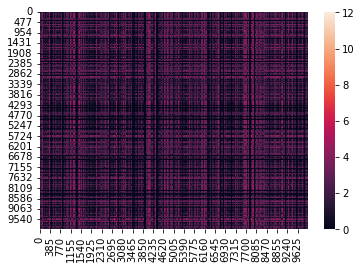

In [35]:
heatmap(r2_matrix)

In [43]:
temp0.shape

(2548, 10000)

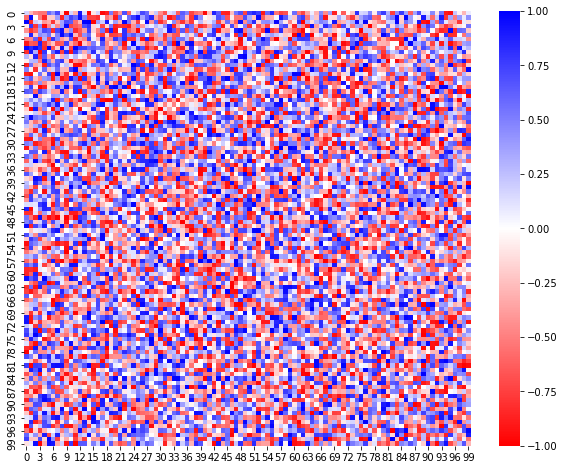

In [36]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap for a smooth transition
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
cmap_name = 'custom_div_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)

# Sample data
data = np.random.uniform(-1, 1, size=(100, 100))

plt.figure(figsize=(10, 8))
sns.heatmap(data, cmap=cm, center=0, vmin=-1, vmax=1)

plt.show()

In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
mean = bimbam.SNPs.mean(axis=0)
sd = bimbam.SNPs.std(axis=0, ddof=1)
temp0 = ((bimbam.SNPs - mean) / sd)
temp = temp0.T @ temp0
corr1_  = 1 / bimbam.SNPs.shape[0] * temp


C:\Users\Archibald\AppData\Local\Temp\ipykernel_9040\3400142392.py:6: RuntimeWarning: invalid value encountered in true_divide
  temp0 = ((bimbam.SNPs - mean) / sd)


<AxesSubplot:>

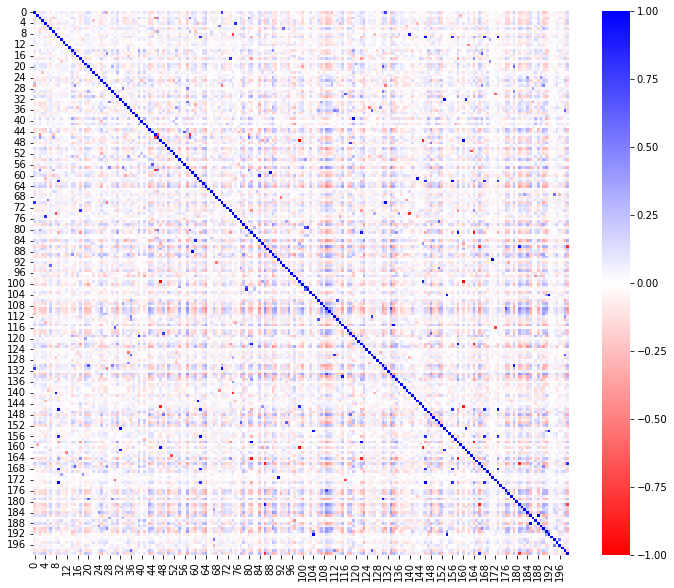

In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Define a custom colormap for a smooth transition
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
cmap_name = 'custom_div_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)
plt.figure(figsize=(12, 10))
sns.heatmap(corr1_[:200,:200],cmap=cm, center=0, vmin=-1, vmax=1)

In [43]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
bimbam_g = bimbam.fake_sample_generate(500)
mean = bimbam_g.SNPs.mean(axis=0)
sd = bimbam_g.SNPs.std(axis=0, ddof=1)
temp0 = ((bimbam_g.SNPs - mean) / sd)
temp = temp0.T @ temp0
corr2_  = 1 / bimbam_g.SNPs.shape[0] * temp


Phenotype generated with s_g2: 3.9e+03, and s_e2: 3.9e+03


C:\Users\Archibald\AppData\Local\Temp\ipykernel_9040\770441801.py:7: RuntimeWarning: invalid value encountered in true_divide
  temp0 = ((bimbam_g.SNPs - mean) / sd)


<AxesSubplot:>

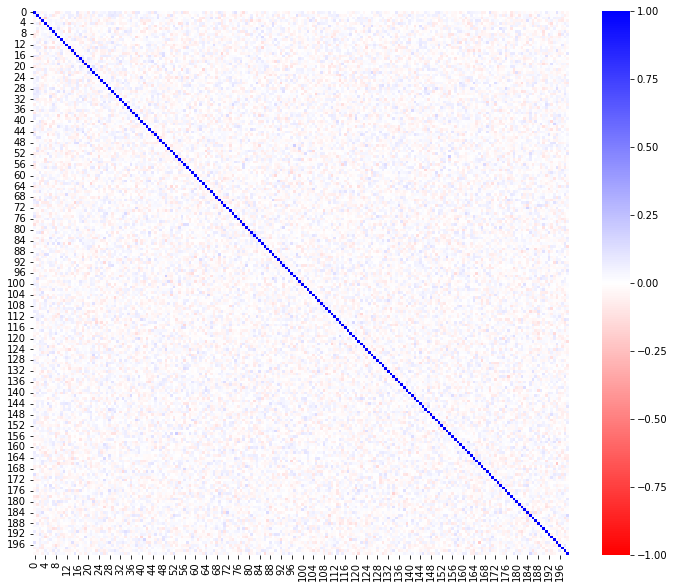

In [44]:
# Define a custom colormap for a smooth transition
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
cmap_name = 'custom_div_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)
plt.figure(figsize=(12, 10))
sns.heatmap(corr2_[:200,:200],cmap=cm, center=0, vmin=-1, vmax=1)

In [30]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
bimbam_g = bimbam.fake_sample_generate(500)
mean = bimbam_g.SNPs.mean(axis=1)
sd = bimbam_g.SNPs.std(axis=1, ddof=1)
temp0 = ((bimbam_g.SNPs.T - mean) / sd).T
temp = temp0.T @ temp0
corr_1  = 1 / bimbam_g.SNPs.shape[0] * temp


Phenotype generated with s_g2: 4.8e+03, and s_e2: 4.8e+03


In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
mean = bimbam.SNPs.mean(axis=0)
sd = bimbam.SNPs.std(axis=0, ddof=1)
temp0 = ((bimbam.SNPs - mean) / sd)
temp = temp0.T @ temp0
corr_2  = 1 / bimbam.SNPs.shape[0] * temp

C:\Users\Archibald\AppData\Local\Temp\ipykernel_9040\1042778813.py:6: RuntimeWarning: invalid value encountered in true_divide
  temp0 = ((bimbam.SNPs - mean) / sd)


<AxesSubplot:>

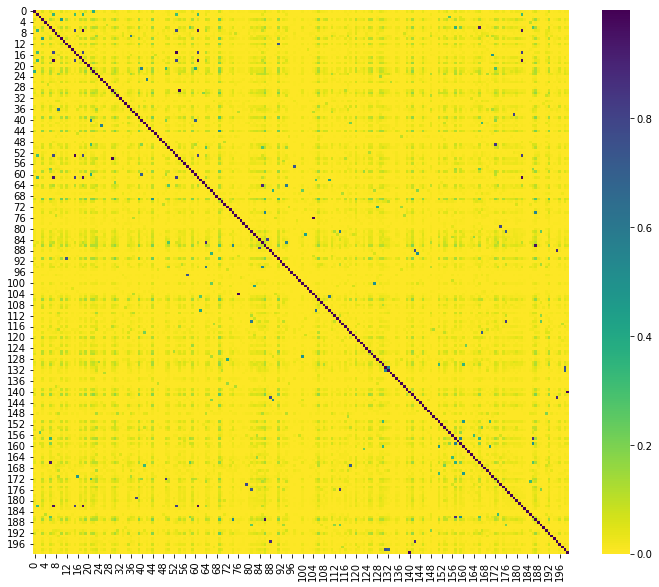

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_2[:200,:200]**2, cmap="viridis_r")

<AxesSubplot:>

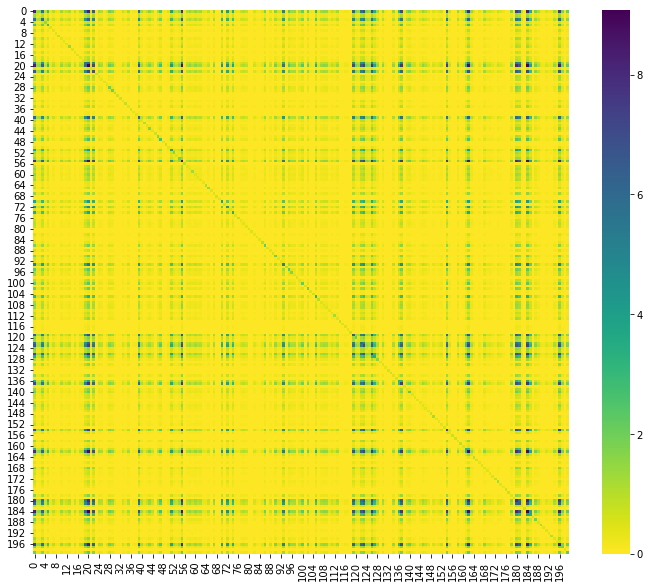

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_1[:200,:200]**2, cmap="viridis_r")